##### Решение данной задачи принадлежит не мне, оно находится по [ссылке](https://habr.com/ru/company/yandex/blog/414997/)
##### Решение произвело на меня впечатление своей красотой и достаточно простым алгоритмом, поэтому хочу реализовать его самостоятельно на другом примере, всё также из вступительных к стажировки Яндекса по ml. 

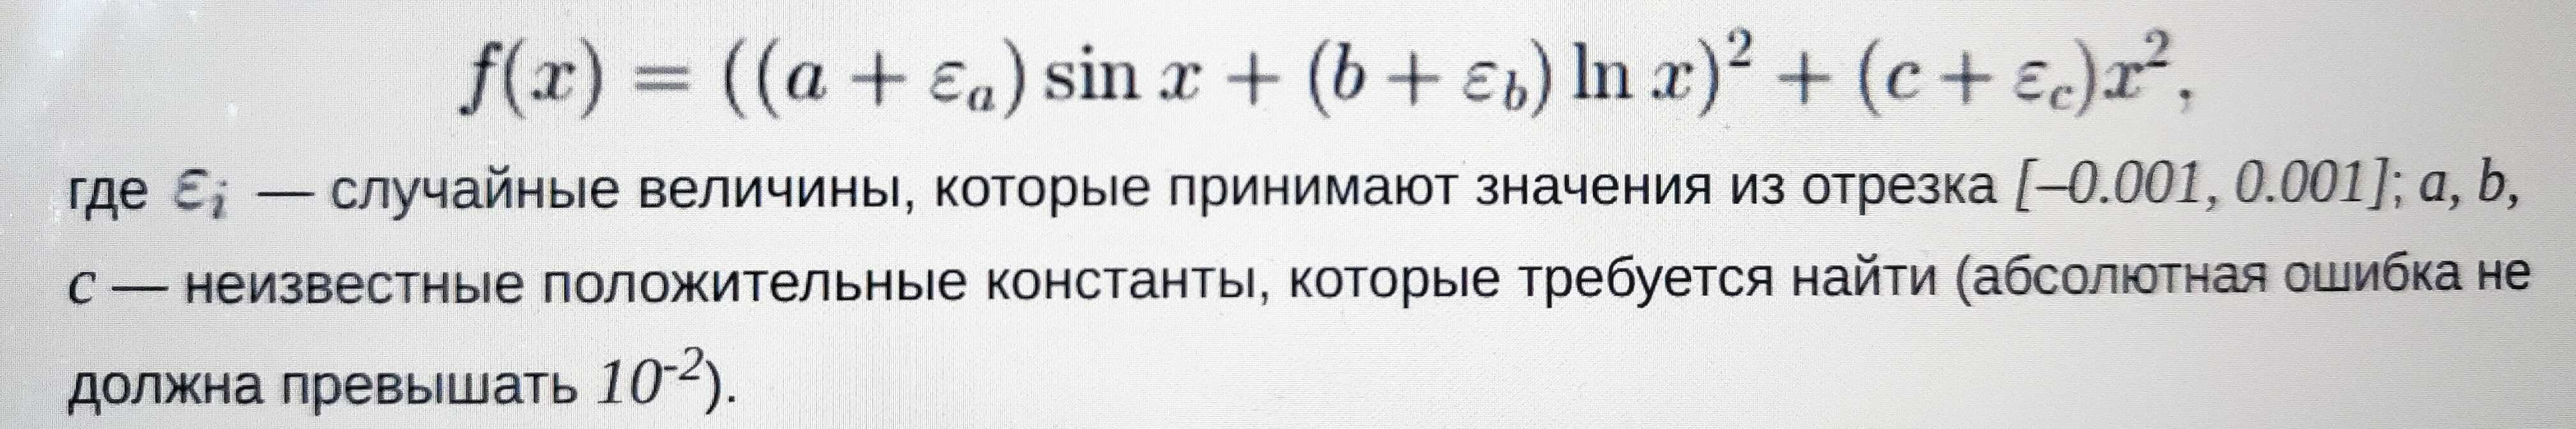

In [1]:
from IPython.display import Image
Image(filename='E:\Desktop\p00125-145530_1_.jpg') 

In [2]:
from IPython.display import Math
#Расскроем скобки без учёта случайных величин
Math(r'f(x) = a^2 \cdot \sin^2(x) + b^2 \cdot \ln^2(x) + 2ab\cdot \sin(x) \cdot \ln(x) + c \cdot x^2')

<IPython.core.display.Math object>

##### Теперь мы получили задачу многомерной линейной регрессии без свободного коэффициента. Признаками в этой задаче являются величины:

In [3]:
Math(r'\sin^2(x), \ln^2(x), \sin(x)*ln(x), x^2')

<IPython.core.display.Math object>

In [4]:
#Коэффициенты a,b,c из этого будут равны:
Math(r'a = \sqrt(t_1), b = \sqrt(t_2), c = t_4')

<IPython.core.display.Math object>

In [5]:
#Дополнительно стоит проверить, что:
Math(r'2\cdot a \cdot b \approx t_3')

<IPython.core.display.Math object>

In [6]:
import numpy as np
import pandas as pd
import sklearn.linear_model as lm

In [7]:
data = pd.read_csv('E:\Desktop\data.csv', header=None)

In [8]:
data.head()

,0,1
0,9.481538,394.853787
1,6.878546,238.295702
2,9.436524,393.053669
3,3.572694,55.666155
4,1.079596,13.537515


##### Ключевой особенностью между решением в статье и этим блокнотом является, то что в статье данные предоставлялись в формате .txt, тут же был дан формат .csv. В статье были проведены определённые действия, которые преобразовывают текст в числа, здесь же я просто перевёд колонны в списки

In [9]:
x_list = data[0].tolist()
y_list = data[1].tolist()

##### Далее, возводим все значения x в величины нашей многомерной линейной регрессии

In [10]:
features = []
for row in x_list:
    curFeatures = [
        np.sin(row) ** 2,              # a^2
        np.log(row) ** 2,              # b^2
        np.sin(row) * np.log(row),     # 2ab
        row ** 2                        # c
    ]
    features.append(curFeatures)

In [11]:
#Обучаем модель на новых величиных(features) и значений функции(y_list)

linearModel = lm.LinearRegression()
linearModel.fit(features, y_list)

coeffs = linearModel.coef_

a = np.sqrt(coeffs[0])
b = np.sqrt(coeffs[1])
c = coeffs[3]

print ("free coeff: ", linearModel.intercept_)
print ("2ab error: ", coeffs[2] - 2 * a * b)
print (a, b, c)

free coeff:  -0.0007005520849645563
2ab error:  -0.0013463278998315786
3.1417288382155846 2.718428892528898 3.999957864335597


##### free coeff удовлетворяет условиям задачи, 2ab error не критична, мы получили оптимальные коэффициенты